<a href="https://colab.research.google.com/github/Guimartinslimaoliveira/Sales_analisys/blob/main/Previs%C3%B5es_Bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM



dataset = pd.read_csv("mega.csv")
dataset

In [ ]:
dataset.dtypes

NameError: name 'dataset' is not defined

In [ ]:
dataset['Date'] = pd.to_datetime(dataset['Date'], format = '%Y-%m-%d')

In [ ]:
df_cripto_fec = dataset[['Date','High']]
df_cripto_fec

,Date,High
0,2019-11-21,8110.098145
1,2019-11-22,7697.382813
2,2019-11-23,7442.258789
3,2019-11-24,7408.577148
4,2019-11-25,7319.856934
...,...,...
908,2022-05-17,30694.490234
909,2022-05-18,30618.716797
910,2022-05-19,30430.751953
911,2022-05-20,30664.976563


In [ ]:
df_cripto_fec = df_cripto_fec.set_index(pd.DatetimeIndex(df_cripto_fec['Date'].values))
df_cripto_fec

,Date,High
2019-11-21,2019-11-21,8110.098145
2019-11-22,2019-11-22,7697.382813
2019-11-23,2019-11-23,7442.258789
2019-11-24,2019-11-24,7408.577148
2019-11-25,2019-11-25,7319.856934
...,...,...
2022-05-17,2022-05-17,30694.490234
2022-05-18,2022-05-18,30618.716797
2022-05-19,2022-05-19,30430.751953
2022-05-20,2022-05-20,30664.976563


In [ ]:
df_cripto_fec.drop('Date', axis=1, inplace=True)
df_cripto_fec

,High
2019-11-21,8110.098145
2019-11-22,7697.382813
2019-11-23,7442.258789
2019-11-24,7408.577148
2019-11-25,7319.856934
...,...
2022-05-17,30694.490234
2022-05-18,30618.716797
2022-05-19,30430.751953
2022-05-20,30664.976563


Text(0.5, 0, 'Date')

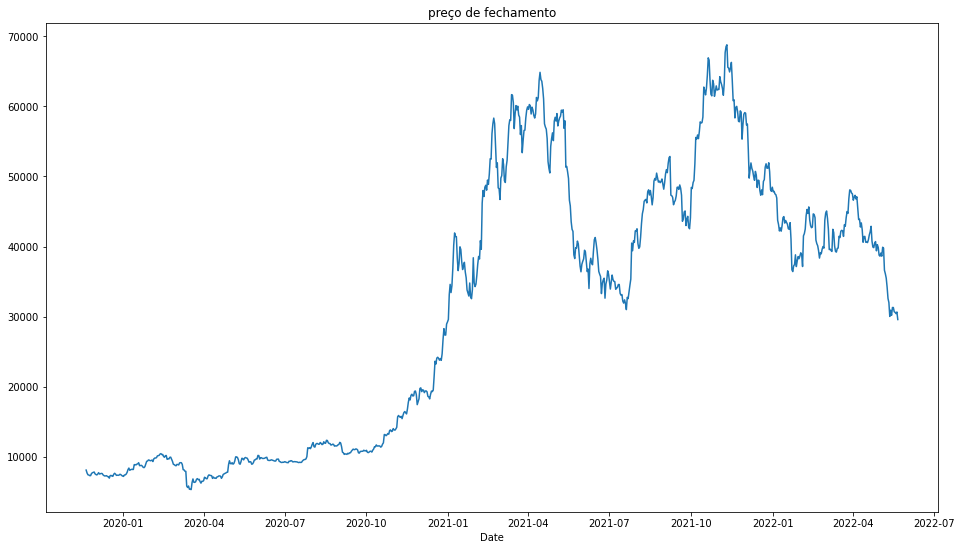

In [ ]:
plt.figure(figsize=(16,9))
plt.title('preço de fechamento')
plt.plot(df_cripto_fec['High'])
plt.xlabel('Date')

In [ ]:
qtd_linhas = len(df_cripto_fec)
qtd_linhas_treino = round(.70*qtd_linhas)
qtd_linhas_teste = qtd_linhas - qtd_linhas_treino

info =  (
    f"linhas_treino = 0: {qtd_linhas_treino}"
    f"linhas_treino = {qtd_linhas_treino}:{qtd_linhas_treino + qtd_linhas_teste}"
)
info

'linhas_treino = 0: 639linhas_treino = 639:913'

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cripto_fec)


In [ ]:
train = df_scaled[:qtd_linhas_treino]
test = df_scaled[qtd_linhas_treino:qtd_linhas_treino + qtd_linhas_teste ]
print(len(train,), len(test))

639 274


In [ ]:
def create_df(df, steps = 1):
  dataX, dataY = [] , []
  for i in range(len(df)-steps-1):
    a = df[i:(i+steps),0]
    dataX.append(a)
    dataY.append(df[i+steps,0])
  return np.array(dataX), np.array(dataY)

In [ ]:
#paramentro para mudança
steps = 15
#______________________________
x_train, y_train = create_df(train, steps)
x_test, y_test = create_df(train, steps)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(623, 15)
(623,)
(623, 15)
(623,)


In [ ]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [ ]:
model = Sequential()
model.add(LSTM(35, return_sequences = True, input_shape = (steps, 1)))
model.add(LSTM(35, return_sequences = True))
model.add(LSTM(35))


#parametro a ser acertado
model.add(Dropout(0.1))
model.add(Dense(1))


In [ ]:
model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 35)            5180      
                                                                 
 lstm_1 (LSTM)               (None, 15, 35)            9940      
                                                                 
 lstm_2 (LSTM)               (None, 35)                9940      
                                                                 
 dropout (Dropout)           (None, 35)                0         
                                                                 
 dense (Dense)               (None, 1)                 36        
                                                                 
Total params: 25,096
Trainable params: 25,096
Non-trainable params: 0
_________________________________________________________________


In [ ]:
validation = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=10, verbose = 2)

Epoch 1/100
63/63 - 19s - loss: 0.1677 - val_loss: 0.0365 - 19s/epoch - 297ms/step
Epoch 2/100
63/63 - 2s - loss: 0.0416 - val_loss: 0.0308 - 2s/epoch - 37ms/step
Epoch 3/100
63/63 - 2s - loss: 0.0331 - val_loss: 0.0248 - 2s/epoch - 34ms/step
Epoch 4/100
63/63 - 1s - loss: 0.0310 - val_loss: 0.0264 - 1s/epoch - 22ms/step
Epoch 5/100
63/63 - 1s - loss: 0.0284 - val_loss: 0.0210 - 1s/epoch - 23ms/step
Epoch 6/100
63/63 - 1s - loss: 0.0272 - val_loss: 0.0168 - 1s/epoch - 22ms/step
Epoch 7/100
63/63 - 1s - loss: 0.0229 - val_loss: 0.0154 - 1s/epoch - 23ms/step
Epoch 8/100
63/63 - 1s - loss: 0.0220 - val_loss: 0.0143 - 1s/epoch - 24ms/step
Epoch 9/100
63/63 - 1s - loss: 0.0203 - val_loss: 0.0136 - 1s/epoch - 23ms/step
Epoch 10/100
63/63 - 1s - loss: 0.0226 - val_loss: 0.0148 - 1s/epoch - 23ms/step
Epoch 11/100
63/63 - 1s - loss: 0.0187 - val_loss: 0.0118 - 1s/epoch - 24ms/step
Epoch 12/100
63/63 - 1s - loss: 0.0178 - val_loss: 0.0130 - 1s/epoch - 23ms/step
Epoch 13/100
63/63 - 1s - loss: 0.

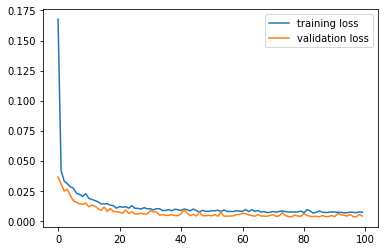

In [ ]:
plt.plot(validation.history['loss'], label = 'training loss')
plt.plot(validation.history['val_loss'], label = 'validation loss')
plt.legend()

In [ ]:
prev  = model.predict(x_test)
prev = scaler.inverse_transform(prev)
prev

array([[ 6896.9165],
       [ 6910.856 ],
       [ 6914.0923],
       [ 6927.5317],
       [ 6937.305 ],
       [ 6888.2407],
       [ 6801.7036],
       [ 6710.315 ],
       [ 6649.35  ],
       [ 6620.2583],
       [ 6574.774 ],
       [ 6530.2114],
       [ 6442.8013],
       [ 6458.446 ],
       [ 6520.809 ],
       [ 6556.016 ],
       [ 6560.2095],
       [ 6634.428 ],
       [ 6758.026 ],
       [ 6831.5845],
       [ 6814.2524],
       [ 6777.362 ],
       [ 6739.52  ],
       [ 6720.86  ],
       [ 6745.9595],
       [ 6764.0356],
       [ 6739.307 ],
       [ 6682.2896],
       [ 6618.313 ],
       [ 6624.5435],
       [ 6661.096 ],
       [ 6728.985 ],
       [ 6857.7134],
       [ 7089.0005],
       [ 7360.604 ],
       [ 7478.0747],
       [ 7529.141 ],
       [ 7563.11  ],
       [ 7577.102 ],
       [ 7578.362 ],
       [ 7776.0747],
       [ 7996.0786],
       [ 8140.8755],
       [ 8251.792 ],
       [ 8338.444 ],
       [ 8438.937 ],
       [ 8386.017 ],
       [ 8296

In [ ]:
leng_test = len(test)
leng_test

In [ ]:
days_input_steps = leng_test - steps
days_input_steps

In [ ]:
input_steps = test[days_input_steps:]
input_steps = np.array(input_steps).reshape(1,-1)
input_steps

In [ ]:
list_output_steps = list(input_steps)
list_output_steps = list_output_steps[0].tolist()
list_output_steps

In [ ]:
pred_output=[]
i=0
n_future =10
while(i<n_future):

  if(len(list_output_steps) > steps):
    input_steps = np.array(list_output_steps[1:])
    print("{} dia. valores de entrada ->{}".format(i,input_steps))
    input_steps = input_steps.reshape(1,-1)
    input_steps = input_steps.reshape((1, steps, 1))
    #print(input_steps)
    pred =  model.predict(input_steps, verbose = 0)
    print('{} dia. Valor Previsto - > {}'.format(i,pred))
    list_output_steps.extend(pred[0].tolist())
    list_output_steps = list_output_steps[1:]
    #print(list_output_steps)
    pred_output.extend(pred.tolist())
    i=i+1
  else:
    input_steps = input_steps.reshape((1, steps, 1))
    pred = model.predict(input_steps, verbose = 0)
    print(pred[0])
    list_output_steps.extend(pred[0].tolist())
    print(len(list_output_steps))
    pred_output.extend(pred.tolist())
    i = i+1

print(pred_output)

In [ ]:
prev = scaler.inverse_transform(pred_output)
prev = np.array(prev).reshape(1,-1)
list_output_prev = list(prev)
list_output_prev = prev[0].tolist()
list_output_prev